<a href="https://colab.research.google.com/github/rizqyjoe/Facial_Expression_Recognition_CNN_VGG16/blob/main/Model%204/1_64%25_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset/fer2013 dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/fer2013 dataset/example_submission.csv
/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013.tar.gz
/content/drive/MyDrive/Dataset/fer2013 dataset/icml_face_data.csv
/content/drive/MyDrive/Dataset/fer2013 dataset/test.csv
/content/drive/MyDrive/Dataset/fer2013 dataset/train.csv
/content/drive/MyDrive/Dataset/fer2013 dataset/dataset/test-private.zip
/content/drive/MyDrive/Dataset/fer2013 dataset/dataset/test-public.zip
/content/drive/MyDrive/Dataset/fer2013 dataset/dataset/train.zip
/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv
/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/README
/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.bib


In [4]:
import keras
from keras.preprocessing import image

In [5]:
from keras import applications as keras_applications

In [6]:
!pip install keras_applications
!pip install git+https://github.com/rcmalli/keras-vggface.git

     |████████████████████████████████| 51kB 4.7MB/s 
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-tc7jfjjd
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-tc7jfjjd
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8312 sha256=be22366394c3f99c110837953c5b2e4110edd649f44cd3386f46f97711a80393
  Stored in directory: /tmp/pip-ephem-wheel-cache-6mis72yj/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [7]:
from keras_vggface.vggface import VGGFace
from keras_vggface import utils

Data Preprocess

In [8]:
os.system('tar -xf /content/drive/MyDrive/Dataset/fer2013 dataset/fer2013.tar.gz');
data = pd.read_csv('/content/drive/MyDrive/Dataset/fer2013 dataset/fer2013/fer2013.csv')
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [9]:
data.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [10]:
train_data = data[data.Usage=='Training']
val_data = data[data.Usage=='PublicTest']
test_data = data[data.Usage=='PrivateTest']

In [11]:
train_data.shape, val_data.shape, test_data.shape

((28709, 3), (3589, 3), (3589, 3))

In [12]:
import collections
import imblearn
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
collections.Counter(train_data.emotion)

Counter({0: 3995, 1: 436, 2: 4097, 3: 7215, 4: 4830, 5: 3171, 6: 4965})

In [14]:
from keras.utils import to_categorical

x_train, y_train = oversampler.fit_resample(train_data.pixels.values.reshape(-1,1),train_data.emotion.values)

# x_train = train_data.pixels.values.reshape(-1,1)
# y_train = train_data.emotion.values

x_val = val_data.pixels.values.reshape(-1,1)
y_val = val_data.emotion.values

x_test = test_data.pixels.values.reshape(-1,1)
y_test = test_data.emotion.values

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
collections.Counter(y_train)

Counter({0: 7215, 1: 7215, 2: 7215, 3: 7215, 4: 7215, 5: 7215, 6: 7215})

In [16]:
x_train = list(x_train)
x_val   = list(x_val)
x_test  = list(x_test)

for i,item in enumerate(x_train):
    x_train[i] = np.fromstring(item[0],sep=' ').reshape(48,48,1)
for i,item in enumerate(x_val):
    x_val[i] = np.fromstring(item[0],sep=' ').reshape(48,48,1)
for i,item in enumerate(x_test):
    x_test[i] = np.fromstring(item[0],sep=' ').reshape(48,48,1)
    
x_train = np.vstack(x_train).reshape(-1,48,48,1)
x_val = np.vstack(x_val).reshape(-1,48,48,1)
x_test = np.vstack(x_test).reshape(-1,48,48,1)

In [17]:
y_train = to_categorical(y_train,num_classes=7)
y_val   = to_categorical(y_val  ,num_classes=7)
y_test  = to_categorical(y_test ,num_classes=7)

In [18]:
from copy import deepcopy as copy

def smooth_labels(y, smooth_factor):
    '''Convert a matrix of one-hot row-vector labels into smoothed versions.

    # Arguments
        y: matrix of one-hot row-vector labels to be smoothed
        smooth_factor: label smoothing factor (between 0 and 1)

    # Returns
        A matrix of smoothed labels.
    '''
    assert len(y.shape) == 2, 'input should be a batch of one-hot-encoded data'
    y2 = copy(y)
    if 0 <= smooth_factor <= 1:
        # label smoothing ref: https://www.robots.ox.ac.uk/~vgg/rg/papers/reinception.pdf
        y2 *= 1 - smooth_factor
        y2 += smooth_factor / y.shape[1]
    else:
        raise Exception(
            'Invalid label smoothing factor: ' + str(smooth_factor))
    return y2

In [19]:
from keras.utils import Sequence
from keras.utils import to_categorical
import cv2
from math import floor

class data_sequence(Sequence):
    '''
      yield sequence of data
      features -- list of features
      labels -- list of labels
      target_channels {int} -- 1 (gray) or 3(RGB)
    '''
    def __init__(self, features, labels, batch_size=128, target_dim=(224,224), 
                 n_classes=7, shuffle=True, smooth=0.0):
        'Initialization'
        assert len(features)==len(labels), 'number of feature and labels not consistent'
        self.features = features
        self.labels = labels
        self.batch_size = batch_size
        self.target_dim = target_dim
        self.target_channels = 3
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.smooth = smooth
        self.sample_count = len(labels)
        self.indexes = np.arange(self.sample_count)
        self.on_epoch_end()
#         self.verbose = verbose

    def __len__(self):
        'Denotes the number of batches per epoch'
        return floor(self.sample_count / self.batch_size)

    def __gray2RGB__(self,x):
      if len(x.shape)==2:
        return np.stack((x,x,x),-1)
      else:
        assert len(x.shape)==3
        if len(x[0,0,:]) == 1:
          return np.stack((x[:,:,0],x[:,:,0],x[:,:,0]),-1)
        else:
          assert len(x[0,0,:])==self.target_channels
      return x


    def __getitem__(self, idx):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
        X = np.empty((self.batch_size, *self.target_dim, self.target_channels))
        Y = np.empty((self.batch_size, self.n_classes))
        for i,ind in enumerate(indexes):
          x = self.features[ind]
          # resize image to the target size 
          x = cv2.resize(x,self.target_dim,interpolation=cv2.INTER_CUBIC)
          x = self.__gray2RGB__(x)
          X[i] = utils.preprocess_input(x, version=2) # or version=2 for VGGFace2 ResNet50  
          y = self.labels[ind]
          if isinstance(y,int):
            Y[i]=to_categorical(y,7)
          else:
            assert len(y)==self.n_classes
            Y[i]=y
        X = np.array(X)
        Y = np.array(Y)
        if self.smooth > 0.0:
          smooth_labels(Y, self.smooth)
        return X,Y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [20]:
train_sequence = data_sequence(x_train,y_train,batch_size=16,target_dim=(224,224),n_classes=7,shuffle=False)
feature,lable = train_sequence.__getitem__(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


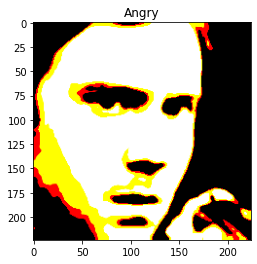

In [21]:
emotion_dict = {0: 'Angry', 1:'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

import matplotlib.pyplot as plt
plt.imshow(feature[0,:,:,:])
plt.title(emotion_dict[np.argmax(lable[0])]);

Model

In [22]:
vggface = VGGFace(model='vgg16', include_top=False, input_shape = (224,224,3))
vggface.trainable = False
vggface.summary()

58916864/58909280 [==============================] - 1s 0us/step
Model: "vggface_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 224, 224, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
______________________________________________________

In [23]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# model = Sequential([vggface,
#                     Flatten(),
#                     Dropout(0.5),
#                     BatchNormalization(),
#                     Dense(128, activation='relu'),
#                     Dropout(0.5),
#                     BatchNormalization(),
#                     Dense(len(emotion_dict), activation='softmax', name = 'classifer')])
model = Sequential([vggface,
                    Flatten(),
                    Dropout(0.25),
                    Dense(2048, activation='relu'),
                    Dropout(0.25),
                    Dense(1024, activation='relu'),
                    Dense(7, activation='softmax', name = 'classifer')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vggface_vgg16 (Functional)   (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              51382272  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
classifer (Dense)            (None, 7)                 7

In [24]:
train_sequence = data_sequence(x_train,y_train,batch_size=64,target_dim=(224,224),n_classes=7,shuffle=True,smooth=0.07)
val_sequence   = data_sequence(x_val,  y_val,  batch_size=64,target_dim=(224,224),n_classes=7,shuffle=True,smooth=0.0)
test_sequence  = data_sequence(x_test, y_test, batch_size=64,target_dim=(224,224),n_classes=7,shuffle=True,smooth=0.0)

train only top layers

In [25]:
model.compile(optimizer = keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(generator = train_sequence,
                           validation_data = val_sequence,
                           epochs = 20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
789/789 [==============================] - 452s 515ms/step - loss: 14.4203 - accuracy: 0.4164 - val_loss: 1.4973 - val_accuracy: 0.4506
Epoch 2/20
789/789 [==============================] - 406s 514ms/step - loss: 1.4021 - accuracy: 0.5190 - val_loss: 1.2582 - val_accuracy: 0.5444
Epoch 3/20
789/789 [==============================] - 406s 515ms/step - loss: 1.2801 - accuracy: 0.5573 - val_loss: 1.2429 - val_accuracy: 0.5603
Epoch 4/20
789/789 [==============================] - 409s 518ms/step - loss: 1.1359 - accuracy: 0.5911 - val_loss: 1.1963 - val_accuracy: 0.5636
Epoch 5/20
789/789 [==============================] - 409s 518ms/step - loss: 1.0473 - accuracy: 0.6139 - val_loss: 1.1386 - val_accuracy: 0.5781
Epoch 6/20
789/789 [==============================] - 409s 519ms/step - loss: 0.9952 - accuracy: 0.6419 - val_loss: 1.1457 - val_accuracy: 0.5798
Epoch 7/20
789/789 [==============================] - 409s 518ms/step - loss: 0.9401 - accuracy: 0.6591 - val_loss: 1.1219 

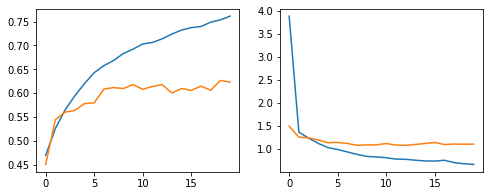

In [26]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

finetune all layer, lr=1e-4

In [27]:
for layer in model.layers[0].layers:
    if 'bn' not in layer.name:
        layer.trainable = True

In [28]:
model.compile(optimizer = keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
hist2 = model.fit_generator(generator = train_sequence,
                            validation_data = val_sequence,
                            epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
789/789 [==============================] - 406s 514ms/step - loss: 0.6069 - accuracy: 0.7785 - val_loss: 1.1190 - val_accuracy: 0.6244
Epoch 2/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5760 - accuracy: 0.7904 - val_loss: 1.1074 - val_accuracy: 0.6289
Epoch 3/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5654 - accuracy: 0.7933 - val_loss: 1.1085 - val_accuracy: 0.6261
Epoch 4/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5572 - accuracy: 0.7955 - val_loss: 1.1207 - val_accuracy: 0.6283
Epoch 5/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5516 - accuracy: 0.7974 - val_loss: 1.1301 - val_accuracy: 0.6250
Epoch 6/10
789/789 [==============================] - 404s 512ms/step - loss: 0.5473 - accuracy: 0.7981 - val_loss: 1.1149 - val_accuracy: 0.6281
Epoch 7/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5465 - accuracy: 0.7989 - val_loss: 1.1250 -

In [29]:
for key in ['accuracy','val_accuracy','loss','val_loss']:
    hist.history[key] = hist.history[key] + hist2.history[key]

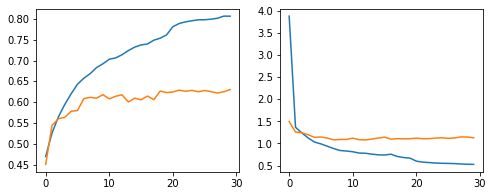

In [30]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

finetune further all, lr=1e-5

In [31]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('VGGfaceTransfer_dropout_smoothing_keras_model', 
                              monitor='val_acc', verbose=0, save_best_only=True,
                              save_weights_only=False, mode='auto', period=1)


model.compile(optimizer = keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
hist3 = model.fit_generator(generator = train_sequence,
                            validation_data = val_sequence,
                            epochs = 10,
                            callbacks=[check_point])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


789/789 [==============================] - 406s 513ms/step - loss: 0.5241 - accuracy: 0.8085 - val_loss: 1.1320 - val_accuracy: 0.6286
Epoch 2/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5159 - accuracy: 0.8112 - val_loss: 1.1301 - val_accuracy: 0.6311
Epoch 3/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5120 - accuracy: 0.8121 - val_loss: 1.1295 - val_accuracy: 0.6300
Epoch 4/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5092 - accuracy: 0.8106 - val_loss: 1.1390 - val_accuracy: 0.6286
Epoch 5/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5113 - accuracy: 0.8121 - val_loss: 1.1369 - val_accuracy: 0.6297
Epoch 6/10
789/789 [==============================] - 404s 513ms/step - loss: 0.5150 - accuracy: 0.8124 - val_loss: 1.1341 - val_accuracy: 0.6281
Epoch 7/10
789/789 [==============================] - 405s 513ms/step - loss: 0.5114 - accuracy: 0.8126 - val_loss: 1.1338 - val_accura

In [32]:
ls

drive/  sample_data/


In [33]:
for key in ['accuracy','val_accuracy','loss','val_loss']:
    hist.history[key] = hist.history[key] + hist3.history[key]

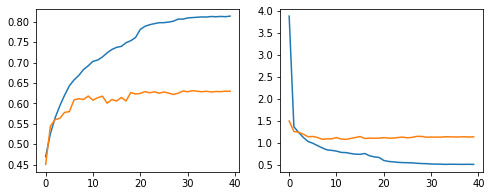

In [34]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

Model Evaluate

In [35]:
model.evaluate(test_sequence)

56/56 [==============================] - 26s 465ms/step - loss: 1.0987 - accuracy: 0.6401


[1.098661184310913, 0.6400669813156128]

In [36]:
model.save('VGGfaceTransfer_dropout_smoothing_keras_model')

INFO:tensorflow:Assets written to: VGGfaceTransfer_dropout_smoothing_keras_model/assets


In [37]:
!tar -czvf VGGfaceTransfer_dropout_smoothing_keras_model.tar.gz VGGfaceTransfer_dropout_smoothing_keras_model

VGGfaceTransfer_dropout_smoothing_keras_model/
VGGfaceTransfer_dropout_smoothing_keras_model/saved_model.pb
VGGfaceTransfer_dropout_smoothing_keras_model/variables/
VGGfaceTransfer_dropout_smoothing_keras_model/variables/variables.data-00000-of-00001
VGGfaceTransfer_dropout_smoothing_keras_model/variables/variables.index
VGGfaceTransfer_dropout_smoothing_keras_model/assets/


In [38]:
from IPython.display import FileLink
FileLink(r'VGGfaceTransfer_dropout_smoothing_keras_model.tar.gz')

/content/VGGfaceTransfer_dropout_smoothing_keras_model.tar.gz

Conf Matrix

In [39]:
import tensorflow as tf
y_pred = []
y_true = []
for x,y in test_sequence:
    y_pred = y_pred + list(model.predict_classes(x))
    y_true = y_true + list(np.argmax(y,axis=1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [40]:
emotion_dict.values()

dict_values(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

In [41]:
emotion_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [42]:
confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
confusion_matrix = np.around(confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

confusion_matrix = pd.DataFrame(confusion_matrix,
                                index = emotion_dict.values(), 
                                columns = emotion_dict.values())

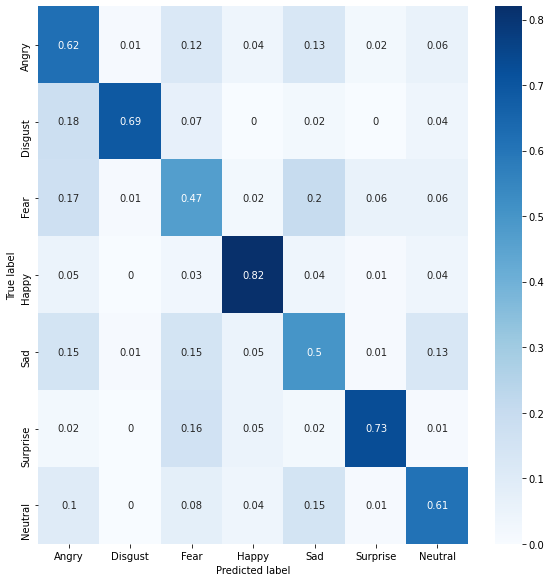

In [43]:
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()